In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Rbeast as rb
import pymannkendall as mk
from statsmodels.tsa.stattools import adfuller
sns.set_theme(style="whitegrid")


## Bayesian changepoint detection con Rbeast

### Analisi changepoint under-21

In [52]:
mins_played=pd.read_excel("Under21_minutes_played.xlsx",index_col=0)
all_teams=pd.read_excel("Under21_minutes_played_teams.xlsx",index_col=0)

In [53]:
mins_played["Minutes_played_italians"]=mins_played["Minutes_played_italians"]+mins_played["Minutes_played_oriundi"]


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.000|*                                               |
|Pr(ncp = 1 )=0.000|*                                               |
|Pr(ncp = 2 )=0.230|***************************                     |
|Pr(ncp = 3 )=0.402|*********************************************** |
|Pr(ncp = 4 )=0.239|*****

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


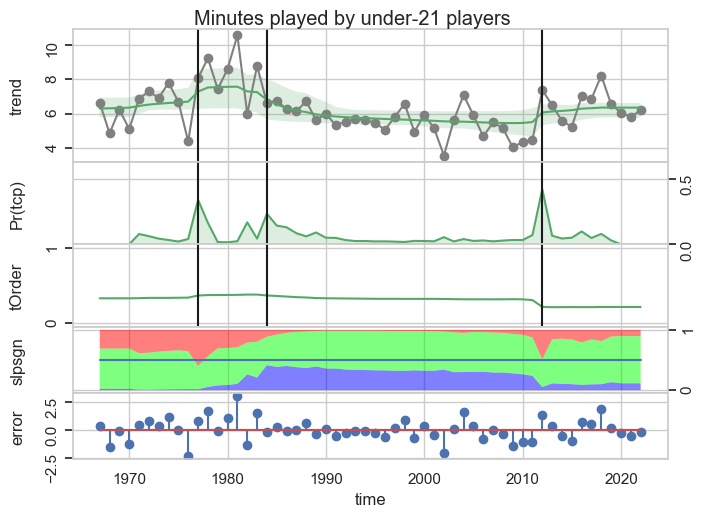

In [55]:
import numpy as np
plt.rcParams['figure.figsize'] = [7, 5]
o=rb.beast(mins_played['Minutes_played_under21'], start=1967, season='none',tcp_minmax=[2,6], print_options = False,print_progress=False)
rb.plot(o,title='Minutes played by under-21 players',ncpStat="mean")
rb.print(o)

In [42]:
import numpy as np
o=rb.beast(mins_played['Minutes_played_under21'][0:32], start=1967, deltat=1,period="1.0 year",mcmc_seed=1,print_options = False,print_progress=False)
#rb.plot(o,title='Minutes played by under-21 players from 1967 to 2000')
#rb.print(o)

In [57]:
#Mann_Kendall_Test_Hamed_Rao_Approach 71/84
data = (mins_played["Minutes_played_under21"][3:17])

#fig, ax = plt.subplots(figsize=(8, 5))
res = mk.hamed_rao_modification_test(data)
print("Mann_Kendall_Test_Hamed_Rao_Approach 71-84:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)

#print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept
#plt.xticks(rotation=90)
#ax.plot(data)
#ax.plot(data.index, trend_line)
#ax.legend(['data', 'trend line'])


Mann_Kendall_Test_Hamed_Rao_Approach 71-84:
Trend:  increasing
Z-Value:  1.9708160452248922
P-Value:  0.0487449207397066
Slope:  0.1999438832772166


In [58]:
data = (mins_played["Minutes_played_under21"][16:27])

#fig, ax = plt.subplots(figsize=(8, 5))
res = mk.hamed_rao_modification_test(data)
print("Mann_Kendall_Test_Hamed_Rao_Approach 83-93:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)
#print(res)
trend_line = np.arange(len(data)) * res.slope + res.intercept
#plt.xticks(rotation=90)
#ax.plot(data)
#ax.plot(data.index, trend_line)
#ax.legend(['data', 'trend line'])
#rottate the x ticks
#print hte result of Mann_Kendall_Test_Hamed_Rao_Approach 84-92 from res


Mann_Kendall_Test_Hamed_Rao_Approach 83-93:
Trend:  decreasing
Z-Value:  -2.8025961989814827
P-Value:  0.0050693095567015956
Slope:  -0.18324915824915822


(<Figure size 800x500 with 5 Axes>,
 array([<Axes: xlabel='[]', ylabel='trend'>,
        <Axes: xlabel='[]', ylabel='Pr(tcp)'>,
        <Axes: xlabel='[]', ylabel='tOrder'>,
        <Axes: xlabel='[]', ylabel='slpsgn'>,
        <Axes: xlabel='time', ylabel='error'>], dtype=object))

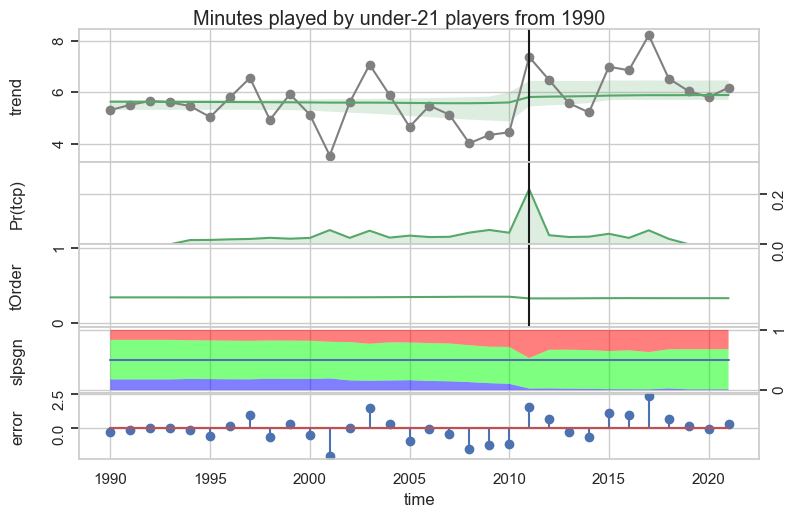

In [56]:
#Trend and changepoint in the number of minutes played by under-21 players from 1990
plt.rcParams['figure.figsize'] = [8, 5]
import Rbeast as rb
import numpy as np
o=rb.beast(mins_played['Minutes_played_under21'][24:], start=1990,season="none",print_options=False,print_progress=False)
rb.plot(o,title='Minutes played by under-21 players from 1990')
#rb.print(o)

In [59]:
data = (mins_played["Minutes_played_under21"][24:47])



#fig, ax = plt.subplots(figsize=(12, 8))
res = mk.hamed_rao_modification_test(data)
print("Mann_Kendall_Test_Hamed_Rao_Approach 1991-2011:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)

#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data[:-2])
#ax.plot(data[:-2].index, trend_line[:-2])
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 1991-2011:
Trend:  no trend
Z-Value:  -0.4225673021598867
P-Value:  0.6726109872286647
Slope:  -0.013080830418291698


In [62]:
#Applying ADCF test
#The ADF test belongs to a category of tests called ‘Unit Root Test’, which is the proper method for testing the stationarity of a time series.
result = adfuller(mins_played["Minutes_played_under21"][27:-2].diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.519733
p-value: 0.000181
Critical values:
	1%: -3.753
	5%: -2.998
	10%: -2.639


In [63]:
#Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
from statsmodels.tsa.stattools import kpss

result = kpss(mins_played["Minutes_played_under21"][23:46])
print('\nKPSS statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))



KPSS statistics: 0.214776
p-value: 0.100000
Critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\franc\AppData\Local\Temp\ipykernel_8720\1739365181.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(mins_played["Minutes_played_under21"][23:46])


In [64]:
data = (mins_played["Minutes_played_under21"][42:])

#fig, ax = plt.subplots(figsize=(8, 4))
res = mk.yue_wang_modification_test(data,alpha=0.05)

print("Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)

#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data)
#ax.plot(data.index, trend_line)
#plt.xticks(rotation=90)
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022:
Trend:  increasing
Z-Value:  2.5748849800331692
P-Value:  0.010027342587477062
Slope:  0.15306574517100832


### Analisi changepoint italiani under-21


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.000|*                                               |
|Pr(ncp = 1 )=0.008|*                                               |
|Pr(ncp = 2 )=0.665|*********************************************** |
|Pr(ncp = 3 )=0.279|********************                            |
|Pr(ncp = 4 )=0.041|***  

C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\Rbeast\plotbeast.py:294: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


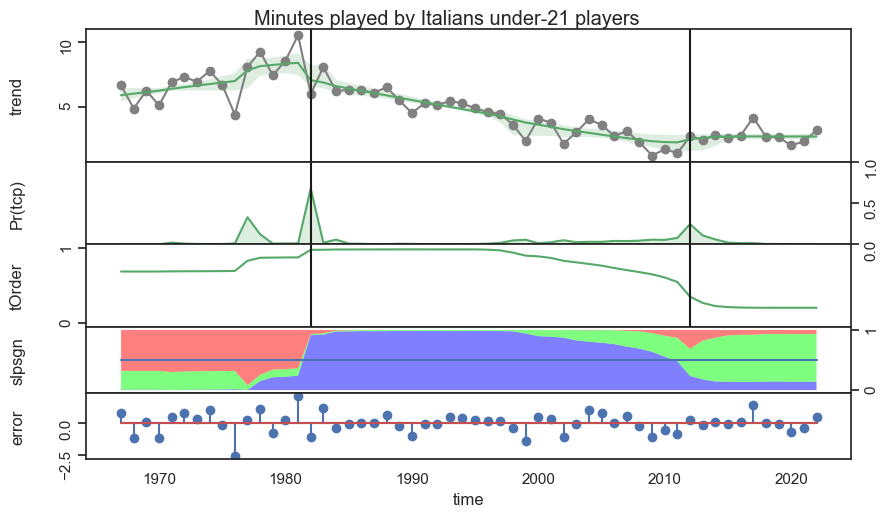

In [65]:
import Rbeast as rb
import numpy as np
plt.rcParams['figure.figsize'] = [9, 5]
sns.set_theme(style="white")
o=rb.beast((mins_played['Minutes_played_italians']), start=1967, deltat=1,period="1.0 year",print_options = False,print_progress=False)
rb.plot(o,title='Minutes played by Italians under-21 players')
rb.print(o)


#####################################################################
#                      Seasonal  Changepoints                       #
#####################################################################
 No seasonal/periodic component present (i.e., season='none')


#####################################################################
#                      Trend  Changepoints                          #
#####################################################################
.-------------------------------------------------------------------.
| Ascii plot of probability distribution for number of chgpts (ncp) |
.-------------------------------------------------------------------.
|Pr(ncp = 0 )=0.007|*                                               |
|Pr(ncp = 1 )=0.585|*********************************************** |
|Pr(ncp = 2 )=0.250|*********************                           |
|Pr(ncp = 3 )=0.129|***********                                     |
|Pr(ncp = 4 )=0.026|***  

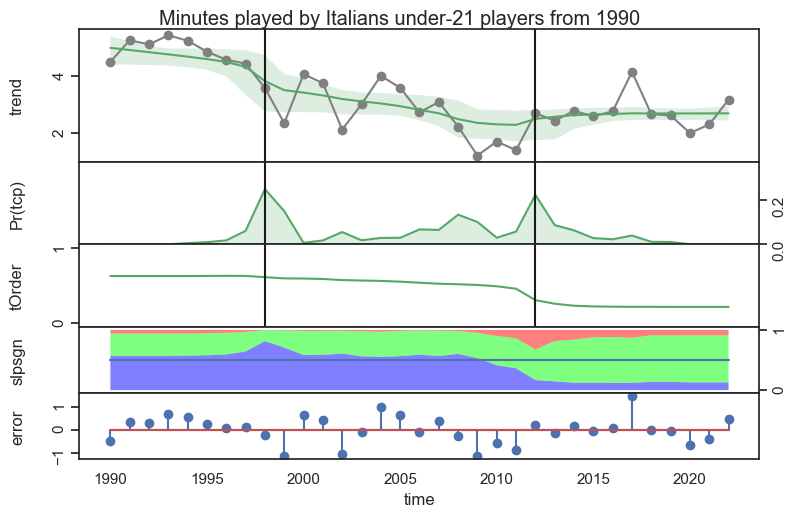

In [66]:
import Rbeast as rb
import numpy as np
plt.rcParams['figure.figsize'] = [8, 5]

o=rb.beast((mins_played['Minutes_played_italians'][23:]), start=1990, deltat=1,period="1.0 year",print_options=False,print_progress=False)
rb.plot(o,title='Minutes played by Italians under-21 players from 1990',ncpStat="mean")
rb.print(o)


In [68]:
data = (mins_played["Minutes_played_italians"][41:] + mins_played["Minutes_played_oriundi"][41:])

#fig, ax = plt.subplots(figsize=(6, 4))
res = mk.hamed_rao_modification_test(data,alpha=0.075)
print("Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022 italian player:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p-0.029)
print("Slope: ",res.slope)


#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data[1:])
#ax.plot(data[1:].index, trend_line[1:])
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 2009-2022 italian player:
Trend:  no trend
Z-Value:  1.286666314194023
P-Value:  0.16921061903884285
Slope:  0.07264373053846739


In [69]:
data = (mins_played["Minutes_played_italians"][25:41] + mins_played["Minutes_played_oriundi"][25:41])

#fig, ax = plt.subplots(figsize=(12, 8))
res = mk.original_test(data,alpha=0.05)
print("Mann_Kendall_Test_Hamed_Rao_Approach 1993-2006 italian player:")
print("Trend: ",res.trend)
print("Z-Value: ",res.z)
print("P-Value: ",res.p)
print("Slope: ",res.slope)
#print(res)
#trend_line = np.arange(len(data)) * res.slope + res.intercept

#ax.plot(data[1:])
#ax.plot(data[1:].index, trend_line[1:])
#ax.legend(['data', 'trend line'])

Mann_Kendall_Test_Hamed_Rao_Approach 1993-2006 italian player:
Trend:  decreasing
Z-Value:  -3.1065536653461625
P-Value:  0.001892819485882491
Slope:  -0.15099589809342134
